In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

Load data

In [2]:
chemistry = 'LFP'
path = './mat/'+chemistry
size = 128
Q = utils.read_mat('./mat/Q.mat')['Qnorm'].flatten()
x_test_0 = utils.read_mat(path+'/x_test_0.mat')['x_test'].T
y_test = utils.read_mat(path+'/y_test.mat')['y_test']

Voltage curve

Degradation modes at sample 942 cycle 4.
	LLI: 6.800000190734863 LAMPE: 8.783333778381348 LAMNE: 12.75


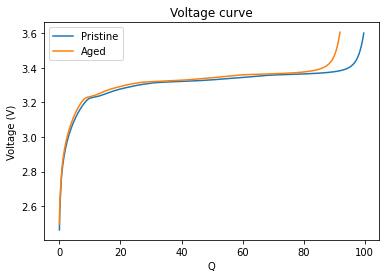

In [3]:
sample = np.random.randint(0, x_test_0.shape[0], 1).item()
cycle = np.random.randint(0, x_test_0.shape[1], 1).item()
pristine_curve = x_test_0[0, 0]
aged_curve = x_test_0[sample, cycle]

print("Degradation modes at sample "+str(sample)+" cycle "+str(cycle)+".\n\tLLI:", y_test[sample][cycle][0], "LAMPE:", y_test[sample][cycle][1], "LAMNE:", y_test[sample][cycle][2])

plt.title("Voltage curve")
plt.plot(Q, pristine_curve, label="Pristine")
plt.plot(Q, aged_curve, label="Aged")
plt.xlabel("Q")
plt.ylabel("Voltage (V)")
plt.legend()
plt.show()

IC curve

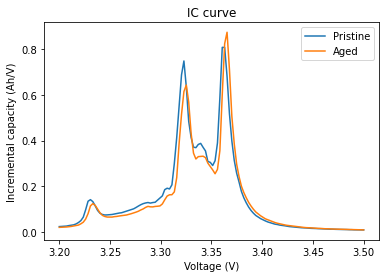

In [4]:
# Convert to IC representation
ui, dqi = utils.IC(pristine_curve, Q, utils.UI_STEP, utils.MIN_V_LFP, utils.MAX_V_LFP)
IC_pristine = utils.reduce_size(ui, dqi, size)
ui, dqi = utils.IC(aged_curve, Q, utils.UI_STEP, utils.MIN_V_LFP, utils.MAX_V_LFP)
IC_aged = utils.reduce_size(ui, dqi, size)
plt.title("IC curve")
plt.plot(np.linspace(utils.MIN_V_LFP, utils.MAX_V_LFP, size), IC_pristine, label="Pristine")
plt.plot(np.linspace(utils.MIN_V_LFP, utils.MAX_V_LFP, size), IC_aged, label="Aged")
plt.xlabel("Voltage (V)")
plt.ylabel("Incremental capacity (Ah/V)")
plt.legend()
plt.show()

DTW image

Warping paths represented as a set of pixels


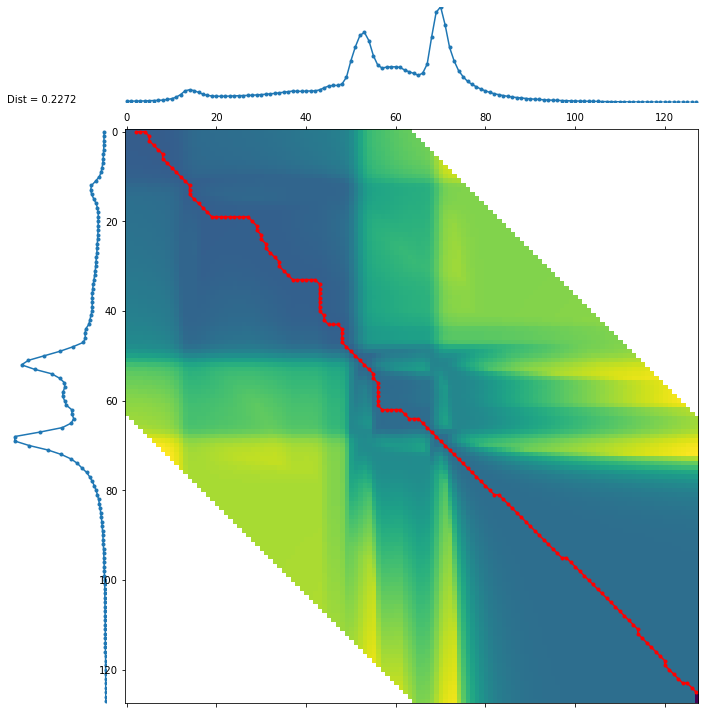

Resulting image for sample 942 cycle 4


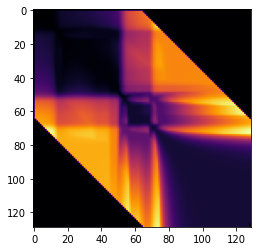

In [5]:
d, paths = dtw.warping_paths(IC_pristine, IC_aged, window=int(size/2), psi=2)
print("Warping paths represented as a set of pixels")
fig, ax = dtwvis.plot_warpingpaths(IC_pristine, IC_aged, paths)
plt.show()

# Process data
# mask values that are not filled
x = np.where(paths == np.inf, -99, paths)
# negative values are replaced by 0
x = np.where(x < 0, 0, x)
# normalise values
x = x/np.max(x)
# reshape the array
x = np.expand_dims(x, -1).astype("float32")
print("Resulting image for sample "+str(sample)+" cycle "+str(cycle))
plt.imshow(x, cmap="inferno")
plt.show()